# Réalisez une étude de santé publique

J'ai récemment rejoint une équipe de la **Food and Agriculture Organization of the United Nations (FAO)**, en tant que data analyst.
Le rôle de la FAO est "d'aider à construire un monde libéré de la faim".

Je me vois confier la mission de réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.

# I) La proportion de personnes en état de sous-nutrition en 2017

In [1]:
# Importation des librairies python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Lexique document sous nutrition :***

- Le pays.
- Intervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants (pour l’intervalle 2012-2014, 
  le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013)

In [2]:
# Importation du fichier CSV 'sous_nutrition'
sous_nutrition = pd.read_csv('sous_nutrition.csv')
display(sous_nutrition.head())

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


***Lexique document population :***

- Le pays.
- L’année.
- La population du pays, exprimée en milliers d’habitants.

In [3]:
# Importation du fichier CSV 'population'
population = pd.read_csv('population.csv')
display(population.head())

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


***Nettoyage du jeu de données***

In [4]:
# Identification du nombre de lignes et de colonnes
print('Le tableau sous_nutrition comporte', sous_nutrition.shape[0], 'lignes et', sous_nutrition.shape[1], 'colonnes.')
print('\nLe tableau population comporte', population.shape[0], 'lignes et', population.shape[1], 'colonnes.\n\n')

#Identification du type des colonnes
print('type des colonnes de sous nutrition :')
display(sous_nutrition.dtypes)
print('\ntype des colonnes de population :')
display(population.dtypes)

Le tableau sous_nutrition comporte 1218 lignes et 3 colonnes.

Le tableau population comporte 1416 lignes et 3 colonnes.


type des colonnes de sous nutrition :


Zone      object
Année     object
Valeur    object
dtype: object


type des colonnes de population :


Zone       object
Année       int64
Valeur    float64
dtype: object

In [5]:
# Filtrage de la colonne Année, de la table sous_nutrition, par '2016-2018'
sous_nutrition = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',:].reset_index()
sous_nutrition.head()

,index,Zone,Année,Valeur
0,4,Afghanistan,2016-2018,10.5
1,10,Afrique du Sud,2016-2018,3.1
2,16,Albanie,2016-2018,0.1
3,22,Algérie,2016-2018,1.3
4,28,Allemagne,2016-2018,NaN


In [6]:
# La colonne Valeur contient une chaîne de caractère '<0.1' qui n'est pas convertible en numérique
display(sous_nutrition.loc[sous_nutrition['Valeur'] == "<0.1",:].head())

# Remplacement de la String '<0.1' par 0.05 qui est la valeur médiane entre 0 et 0.1
sous_nutrition.loc[sous_nutrition['Valeur'] == "<0.1", 'Valeur'] = 0.05
display(sous_nutrition.dtypes)

# Conversion de la colonne Valeur en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])
display(sous_nutrition.dtypes)

,index,Zone,Année,Valeur
10,64,Arménie,2016-2018,<0.1
17,106,Barbade,2016-2018,<0.1
20,124,Belize,2016-2018,<0.1
32,196,Cabo Verde,2016-2018,<0.1
38,232,Chine - RAS de Macao,2016-2018,<0.1


index      int64
Zone      object
Année     object
Valeur    object
dtype: object

index       int64
Zone       object
Année      object
Valeur    float64
dtype: object

In [7]:
# Regroupement des Valeurs par Zone et reset index
df_ss_nutrition = sous_nutrition.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()
df_ss_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2016-2018,10.5
1,Afrique du Sud,2016-2018,3.1
2,Albanie,2016-2018,0.1
3,Algérie,2016-2018,1.3
4,Allemagne,2016-2018,0.0


In [8]:
# Vérification des valeurs manquantes
df_ss_nutrition.isna().any()

Zone      False
Année     False
Valeur    False
dtype: bool

In [9]:
# Renommage des intervalles d'années en année unique
df_ss_nutrition.loc[df_ss_nutrition['Année'] == '2016-2018', 'Année'] = 2017

# Conversion de la colonne 'Valeur' en milliers d'habitants
df_ss_nutrition['Valeur'] *= 1_000 
display(df_ss_nutrition.head())

,Zone,Année,Valeur
0,Afghanistan,2017,10500.0
1,Afrique du Sud,2017,3100.0
2,Albanie,2017,100.0
3,Algérie,2017,1300.0
4,Allemagne,2017,0.0


In [10]:
# Jointure de la table 'df_ss_nutrition' avec 'population'
df_ss_nut_pop = pd.merge(df_ss_nutrition, population.loc[population['Année'] == 2017], on=['Zone', 'Année'], how='inner')

# Renommage colonnes Valeur_x et Valeur_y
df_ss_nut_pop.rename(columns={'Valeur_x':'Habitants en sous-alimentation (milliers)', 'Valeur_y':'Habitants (milliers)'}, inplace=True)
df_ss_nut_pop.head()

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers)
0,Afghanistan,2017,10500.0,36296.113
1,Afrique du Sud,2017,3100.0,57009.756
2,Albanie,2017,100.0,2884.169
3,Algérie,2017,1300.0,41389.189
4,Allemagne,2017,0.0,82658.409


In [11]:
# Ajout de la colonne proportion de personnes en état de sous nutrition
df_ss_nut_pop['proportion'] = (df_ss_nut_pop['Habitants en sous-alimentation (milliers)']*100) / df_ss_nut_pop['Habitants (milliers)'].sum()
df_ss_nut_pop.head()

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion
0,Afghanistan,2017,10500.0,36296.113,0.139187
1,Afrique du Sud,2017,3100.0,57009.756,0.041093
2,Albanie,2017,100.0,2884.169,0.001326
3,Algérie,2017,1300.0,41389.189,0.017233
4,Allemagne,2017,0.0,82658.409,0.000000


In [12]:
# Rapport du nombre d'habitants en sous alimentation sur la population mondiale
total_habitants_ss_alim = df_ss_nut_pop['Habitants en sous-alimentation (milliers)'].sum()
total_habitants = df_ss_nut_pop['Habitants (milliers)'].sum()
print('Le nombre de personnes en sous-alimentation dans le monde en 2017 est de', total_habitants_ss_alim / 1_000, 'millions d\'habitants,')
print('pour un total de', round(total_habitants / 1_000_000, 3), 'milliards d\'habitants dans le monde.\n')
print('Ce qui représente', round((total_habitants_ss_alim * 100) / total_habitants, 2), '% de la population mondiale.\n')

# Exportation du fichier en CSV pour une utilisation ultérieure
df_ss_nut_pop.to_csv('C:/Users/open_/Desktop/df_ss_nut_pop.csv', index=False)

Le nombre de personnes en sous-alimentation dans le monde en 2017 est de 536.7 millions d'habitants,
pour un total de 7.544 milliards d'habitants dans le monde.

Ce qui représente 7.11 % de la population mondiale.



# II) Le nombre théorique de personnes qui pourraient être nourries

***Lexique document disponibilité alimentaire :***

- Le pays.
- Le produit.
- 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, 
  qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, 
  elle correspond à une calorie réelle.
- 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. 
  Elles sont toutes exprimées en milliers de tonnes.
- Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

In [13]:
# Importation du fichier CSV 'dispo_alimentaire'
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
display(dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


***Lexique document population :*** 

- Le pays.
- L’année.
- La population du pays, exprimée en milliers d’habitants.

In [14]:
# Importation du fichier CSV 'population'
population = pd.read_csv('population.csv')
display(population.head())

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


***Lexique document sécurité alimentaire :***

- Le pays.
- L'année.
- Les besoins en Kcal d'un individu par jour et par pays.

In [15]:
# Importation du fichier CSV 'securite_alimentaire' pour déterminer les besoins en Kcal par personne par jour
securite_alimentaire = pd.read_csv('securite_alimentaire.csv')
display(securite_alimentaire.head())

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2134.0,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2406.0,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2490.0,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2289.0,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6128,Valeur,21057,Besoins énergétiques alimentaires moyens (kcal...,2017,2017,Kcal/personne/jour,2545.0,E,Valeur estimée,NaN


In [16]:
# Identification du nombre de lignes et de colonnes
print('Le tableau dispo_alimentaire comporte', dispo_alimentaire.shape[0], 'lignes et', dispo_alimentaire.shape[1], 'colonnes.')
print('\nLe tableau population comporte', population.shape[0], 'lignes et', population.shape[1], 'colonnes.\n')

#Identification du type des colonnes
print('type de colonnes de dispo_alimentaire :')
display(dispo_alimentaire.dtypes)
print('\ntype de colonnes de population :')
display(population.dtypes)

Le tableau dispo_alimentaire comporte 15605 lignes et 18 colonnes.

Le tableau population comporte 1416 lignes et 3 colonnes.

type de colonnes de dispo_alimentaire :


Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             


type de colonnes de population :


Zone       object
Année       int64
Valeur    float64
dtype: object

In [17]:
# Moyenne des valeurs manquantes
dispo_alimentaire.isna().mean()

Zone                                                             0.000000
Produit                                                          0.000000
Origine                                                          0.000000
Aliments pour animaux                                            0.825697
Autres Utilisations                                              0.647805
Disponibilité alimentaire (Kcal/personne/jour)                   0.087408
Disponibilité alimentaire en quantité (kg/personne/an)           0.101890
Disponibilité de matière grasse en quantité (g/personne/jour)    0.244217
Disponibilité de protéines en quantité (g/personne/jour)         0.259148
Disponibilité intérieure                                         0.014290
Exportations - Quantité                                          0.216533
Importations - Quantité                                          0.048254
Nourriture                                                       0.101890
Pertes                                

In [18]:
# Filtrage de la population en 2017 par pays
pop2017_pays = population.loc[population['Année'] == 2017, ['Zone', 'Année', 'Valeur']]
pop2017_pays.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [19]:
# Jointure 'Dispo_alimentaire' et 'Population'
dispo_alim_pop2017 = pd.merge(dispo_alimentaire, pop2017_pays, on='Zone', how='left')
dispo_alim_pop2017 = dispo_alim_pop2017.loc[:, ['Zone', 'Produit', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Année', 'Valeur']]
dispo_alim_pop2017.rename(columns={'Valeur':'Population(milliers)'}, inplace=True)
dispo_alim_pop2017['Disponibilité alimentaire totale(Kcal/jour)'] = dispo_alim_pop2017['Disponibilité alimentaire (Kcal/personne/jour)'] * (dispo_alim_pop2017['Population(milliers)'] * 1_000)
dispo_alim_pop2017.head()

,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Année,Population(milliers),Disponibilité alimentaire totale(Kcal/jour)
0,Afghanistan,Abats Comestible,animale,5.0,2017.0,36296.113,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,2017.0,36296.113,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,2017.0,36296.113,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,2017.0,36296.113,0.0
4,Afghanistan,Bananes,vegetale,4.0,2017.0,36296.113,145184452.0


### Disponibilité alimentaire mondiale (Kcal/jour) et (Kcal/an) en 2017

In [20]:
# Disponibilité alimentaire totale (Kcal/jour) en 2017
dispo_alim_pop2017_total = dispo_alim_pop2017['Disponibilité alimentaire totale(Kcal/jour)'].sum()
print('La disponibilité alimentaire mondiale par jour est de', round((dispo_alim_pop2017_total / 1_000_000_000), 3), 'milliards de Kcal.')

# Disponibilité alimentaire totale (Kcal/an) en 2017
dispo_alim_pop2017_total_an = (dispo_alim_pop2017['Disponibilité alimentaire totale(Kcal/jour)']*365).sum()
print('La disponibilité alimentaire mondiale par an est de', round((dispo_alim_pop2017_total_an / 1_000_000_000), 3), 'milliards de Kcal.')


La disponibilité alimentaire mondiale par jour est de 20918.985 milliards de Kcal.
La disponibilité alimentaire mondiale par an est de 7635429.389 milliards de Kcal.


### Besoins en Kcal pour un être humain

In [21]:
# Moyenne journalière des besoins en Kcal pour un être humain
besoins_kcal = securite_alimentaire.groupby(['Produit', 'Unité'])['Valeur'].mean().reset_index()
besoins_kcal_pers_jour = besoins_kcal.iloc[0,2]
print('Les besoins journaliers par personne sont d\'environ', int(besoins_kcal_pers_jour), 'Kcal')

Les besoins journaliers par personne sont d'environ 2355 Kcal


# Nombre de personnes nourris par jour

In [22]:
# Nombre de personnes nourris par jour
population_nourrie = dispo_alim_pop2017_total / besoins_kcal_pers_jour
print('En théorie nous pouvons nourrir environ', round(population_nourrie / 1_000_000_000, 3), 'milliards d\'habitants.')

En théorie nous pouvons nourrir environ 8.881 milliards d'habitants.


### Taille de la population mondiale en 2017

In [23]:
# Total de la population mondiale en 2017
pop2017 = population.loc[population['Année'] == 2017, 'Valeur'].sum()
print('La taille de la population mondiale est de', round(pop2017/1_000_000, 3), 'milliards d\'habitants en 2017')

La taille de la population mondiale est de 7.548 milliards d'habitants en 2017


### Comparaison avec la population mondiale

In [24]:
# Comparaison avec la population mondiale
rapport_pop_nourrie = ((population_nourrie / 1_000_000_000) * 100) / (pop2017 / 1_000_000)
rapport_pop_nourrie
print('En théorie le nombre de personnes nourris devrait représenter', round(rapport_pop_nourrie, 2), '% de la population mondiale.')
print('\nNous pouvons donc couvrir les besoins alimentaires de tous les habitants de la planète.\n')

En théorie le nombre de personnes nourris devrait représenter 117.66 % de la population mondiale.

Nous pouvons donc couvrir les besoins alimentaires de tous les habitants de la planète.



# III) Disponibilité alimentaire des produits végétaux

In [25]:
# Reprise de la table disponibilité alimentaire (jointure entre disponibilité alimentaire et population 2017), filtré par origine végétale
dispo_alim_pop2017_vegetal = dispo_alim_pop2017.loc[dispo_alim_pop2017['Origine'] == 'vegetale', : ].copy()
dispo_alim_pop2017_vegetal['Disponibilité alimentaire totale(Kcal/an)'] = dispo_alim_pop2017_vegetal['Disponibilité alimentaire totale(Kcal/jour)'] * 365
print('\nLa colonne Disponibilité alimentaire totale(Kcal/an) représente la disponibilité alimentaire (Kcal/personne/jour) multipliée par la population et par 365 jours')
display(dispo_alim_pop2017_vegetal.head())

# Disponibilité alimentaire d'origine végétale
dispo_produits_vegetaux = dispo_alim_pop2017_vegetal.loc[:, 'Disponibilité alimentaire totale(Kcal/an)'].sum()

# Nombre de personnes nourris
pop_nourris = dispo_produits_vegetaux / (besoins_kcal_pers_jour * 365)

print('\nLa disponibilité alimentaire des produits végétaux est d\'environ', round((dispo_produits_vegetaux / 1_000_000_000), 3), 'milliards de Kcal.\n')
print('La population nourrie en produits végétaux représente', round((pop_nourris * 100) / (pop2017 * 1_000), 2), '% de la population totale.\n')


La colonne Disponibilité alimentaire totale(Kcal/an) représente la disponibilité alimentaire (Kcal/personne/jour) multipliée par la population et par 365 jours


,Zone,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Année,Population(milliers),Disponibilité alimentaire totale(Kcal/jour),Disponibilité alimentaire totale(Kcal/an)
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,2017.0,36296.113,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,1.0,2017.0,36296.113,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,2017.0,36296.113,0.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,4.0,2017.0,36296.113,145184452.0,5.299232e+10
6,Afghanistan,Bière,vegetale,0.0,2017.0,36296.113,0.0,0.000000e+00



La disponibilité alimentaire des produits végétaux est d'environ 6300178.937 milliards de Kcal.

La population nourrie en produits végétaux représente 97.08 % de la population totale.



# IV) Disponibilité alimentaire intérieure

La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays. Nous la représentons sous cette formule algébrique :

### **Disponibilité intérieure = production + importations - exportations + variation de stock**

(En détail : Disponibilité intérieure = nourriture + pertes + semences + traitement + aliments pour animaux + autres utilisations)

### Localisation des variables utilisées pour la disponibilité intérieure

In [26]:
# Localisation des variables utilisées et stockage dans un tableau temporaire
temp1 = pd.DataFrame(dispo_alimentaire[['Zone', 'Produit', 'Origine', 'Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']])

# Remplacement des NaN par 0
temp1.fillna(0, inplace=True)
temp1.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


### Calcul de la disponibilité intérieure et ajout au tableau

In [27]:
# Création d'une colonne 'Disponibilité intérieure calculée' dans tableau temporaire pour vérifier les composantes de 'Disponibilité intérieure'
temp1['disponibilité intérieure calculée'] = temp1['Production'] + temp1['Importations - Quantité'] - temp1['Exportations - Quantité'] + temp1['Variation de stock']
temp1.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,disponibilité intérieure calculée
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,41.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,82.0


# a) Part de la disponibilité intérieure, attribuée à l'alimentation animale

,Origine,Disponibilité intérieure,Production,Importations - Quantité,Exportations - Quantité,Variation de stock,rapport %
0,animale,1366750.0,1372054.0,234667.0,243658.0,3720.0,13.877052
1,vegetale,8482244.0,8637626.0,1061386.0,1108500.0,-108122.0,86.122948



La part de la disponibilité intérieure, attribuée à l'alimentation animale, est de 1366.75 millions de tonnes.

Ce qui représente 13.88 % de la disponibilité intérieure.



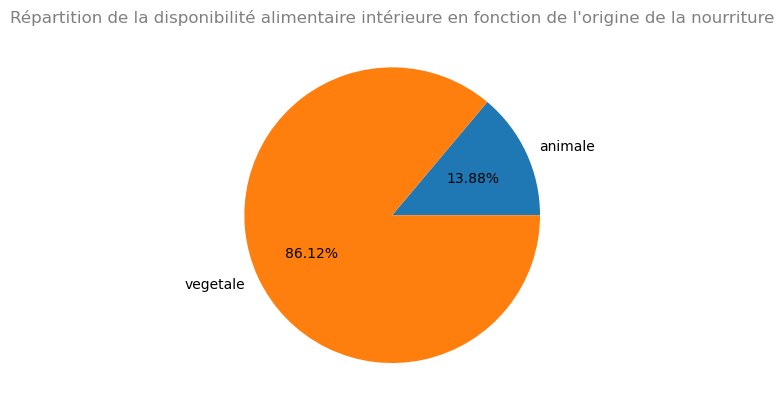

In [28]:
# Affichage de la disponibilité intérieure et de ses composantes, regroupé par l'origine des produits
part1 = temp1.groupby('Origine')[['Disponibilité intérieure', 'Production', 'Importations - Quantité', 'Exportations - Quantité', 'Variation de stock']].sum().reset_index()
part1['rapport %'] = (part1['Disponibilité intérieure'] * 100) / part1.loc[:, 'Disponibilité intérieure'].sum()
display(part1)
print('\nLa part de la disponibilité intérieure, attribuée à l\'alimentation animale, est de', (part1.iloc[0,1])/1_000, 'millions de tonnes.\n')
print('Ce qui représente', round(part1.iloc[0,6], 2), '% de la disponibilité intérieure.\n')

# Représentation graphique
plt.pie(x=part1['Disponibilité intérieure'], labels=part1['Origine'], autopct='%.2f%%')
plt.title('Répartition de la disponibilité alimentaire intérieure en fonction de l\'origine de la nourriture', size=12, c='grey')
plt.show()

# b) Part perdue de la disponibilité intérieure

In [29]:
# Affichage de la disponibilité intérieure et des pertes
part2 = temp1.groupby('Origine')[['Disponibilité intérieure', 'Pertes']].sum().reset_index()
part2['rapport %'] = (part2['Pertes'] * 100) / part2['Disponibilité intérieure']
display(part2)
print('La part perdue totale de la disponibilité intérieure est de', ((part2.iloc[0,2]) + (part2.iloc[1,2])) / 1_000, 'millions de tonnes.')
print('Ce qui représente', round((((part2.iloc[0,2]) + (part2.iloc[1,2])) * 100) / part2.loc[:, 'Disponibilité intérieure'].sum(), 2), '% de la disponibilité intérieure.\n')
print('La part perdue de la disponibilité intérieure, attribuée à l\'alimentation animale, est de', (part2.iloc[0,2])/1_000, 'millions de tonnes.')
print('Ce qui représente', round(part2.iloc[0,3], 2), '% de la disponibilité intérieure.')
print('La part perdue de la disponibilité intérieure, attribuée à l\'alimentation végétale, est de', (part2.iloc[1,2])/1_000, 'millions de tonnes.')
print('Ce qui représente', round(part2.iloc[1,3], 2), '% de la disponibilité intérieure.\n' )

,Origine,Disponibilité intérieure,Pertes,rapport %
0,animale,1366750.0,23930.0,1.750869
1,vegetale,8482244.0,429768.0,5.066678


La part perdue totale de la disponibilité intérieure est de 453.698 millions de tonnes.
Ce qui représente 4.61 % de la disponibilité intérieure.

La part perdue de la disponibilité intérieure, attribuée à l'alimentation animale, est de 23.93 millions de tonnes.
Ce qui représente 1.75 % de la disponibilité intérieure.
La part perdue de la disponibilité intérieure, attribuée à l'alimentation végétale, est de 429.768 millions de tonnes.
Ce qui représente 5.07 % de la disponibilité intérieure.



# c) Part de la disponibilité intérieure, utilisée pour l'alimentation humaine

In [30]:
# Affichage de la disponibilité intérieure et de la disponibilité alimentaire pour l'humain
part3 = temp1.groupby('Origine')[['Disponibilité intérieure', 'Nourriture']].sum().reset_index()
part3['rapport %'] = (part3['Nourriture'] * 100) / (part3['Disponibilité intérieure'])
display(part3)
print('\nLa part de la disponibilité intérieure totale, utilisée pour l\'alimentation humaine, est de',((part3.iloc[0,2])/1_000) + ((part3.iloc[1,2])/1_000), 'millions de tonnes.')
print('Ce qui représente', round((((part3.iloc[0,2]) + (part3.iloc[1,2])) * 100) / part3.loc[:, 'Disponibilité intérieure'].sum(), 2), '% de la disponibilité intérieure.\n')
print('La part de la disponibilité intérieure d\'origine animale, utilisée pour l\'alimentation humaine, \nest de', (part3.iloc[0,2])/1_000, 'millions de tonnes.')
print('La part de la disponibilité intérieure d\'origine végétale, utilisée pour l\'alimentation humaine, \nest de', (part3.iloc[1,2])/1_000, 'millions de tonnes.\n')

,Origine,Disponibilité intérieure,Nourriture,rapport %
0,animale,1366750.0,1183716.0,86.608085
1,vegetale,8482244.0,3692542.0,43.532608



La part de la disponibilité intérieure totale, utilisée pour l'alimentation humaine, est de 4876.258 millions de tonnes.
Ce qui représente 49.51 % de la disponibilité intérieure.

La part de la disponibilité intérieure d'origine animale, utilisée pour l'alimentation humaine, 
est de 1183.716 millions de tonnes.
La part de la disponibilité intérieure d'origine végétale, utilisée pour l'alimentation humaine, 
est de 3692.542 millions de tonnes.



## La disponibilité alimentaire
La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.

### **Nourriture** = importations - exportations + production - pertes - semences - traitement + variation de stock - aliments pour animaux - autres utilisations


In [31]:
# Réutilisation du tableau temporaire temp1
temp1.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,disponibilité intérieure calculée
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,41.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,82.0


In [32]:
# Création d'une colonne 'Nourriture calculée' dans temp1 pour vérifier les composantes de 'Nourriture'
temp1['nourriture calculée'] = temp1['Importations - Quantité'] - temp1['Exportations - Quantité'] + temp1['Production'] - temp1['Pertes'] - temp1['Semences'] - temp1['Traitement'] + temp1['Variation de stock'] - temp1['Aliments pour animaux'] - temp1['Autres Utilisations']
temp1.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,disponibilité intérieure calculée,nourriture calculée
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0,53.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0,41.0,39.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0,82.0,82.0


# V) Equation entre disponibilité intérieure et disponibilité alimentaire

## La disponibilité intérieure

La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays. Nous la représentons sous cette formule algébrique :

**Disponibilité intérieure = production + importations - exportations + variation de stock**

(En détail : Disponibilité intérieure = nourriture + pertes + semences + traitement + aliments pour animaux + autres utilisations)

## La disponibilité alimentaire ou nourriture

La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine. Nous la représentons sous cette formule algébrique :

**Nourriture = production + variation de stock + importations - exportations - pertes - semences - traitement - aliments pour animaux - autres utilisations**

# VI) Utilisation des céréales

In [33]:
# Importation de la liste des céréales (provenance FAO)
liste_cereales = pd.read_csv('cereales_liste.csv')
print('Liste céréales :')
display(liste_cereales.head())

# Extraction de la liste des céréales 
liste_cereale = liste_cereales['Produit'].unique()
liste_cereale = ['Blé et produits', 'Riz et produits', 'Orge et produits', 'Maïs et produits', 'Seigle et produits', 'Avoine', 'Millet et produits', 'Sorgho et produits', 'Céréales, Autres']
print('\nliste_céréale :\n')
display(liste_cereale)

# Importation du fichier CSV 'dispo_alimentaire'
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
print('\nDisponibilité alimentaire :')
display(dispo_alimentaire.head())

Liste céréales :


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2511,Blé et produits,2013,2013,Kcal/personne/jour,1369,E,Valeur estimée
1,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2805,Riz (Eq Blanchi),2013,2013,Kcal/personne/jour,141,E,Valeur estimée
2,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2513,Orge et produits,2013,2013,Kcal/personne/jour,26,E,Valeur estimée
3,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2514,Maïs et produits,2013,2013,Kcal/personne/jour,21,E,Valeur estimée
4,FBSH,"Bilans Alimentaires (-2013, ancienne méthodolo...",4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2517,Millet et produits,2013,2013,Kcal/personne/jour,3,E,Valeur estimée



liste_céréale :



['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres']


Disponibilité alimentaire :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


## a) Utilisation des céréales dans l'alimentation humaine et animale

In [34]:
# Disponibilité alimentaire de la catégorie céréales
dispo_alimentaire_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste_cereale), :]
display(dispo_alimentaire_cereales.head())

# Disponibilité intérieure de la catégorie céréales
dispo_int_cereales = dispo_alimentaire_cereales['Disponibilité intérieure'].sum()

# Disponibilité alimentaire de la catégorie céréales réservé à l'humain
dispo_alim_cereales_humain = dispo_alimentaire_cereales['Nourriture'].sum()
print('\nLa disponibilité alimentaire de la catégorie céréales réservée à l\'humain, est de', dispo_alim_cereales_humain, 'milliers de tonnes.')

# Rapport de la nourriture humaine de la catégorie céréales
print('Ce qui représente', round((dispo_alim_cereales_humain * 100) / dispo_int_cereales, 2), '% de la disponibilité intérieure.')

# Disponibilité alimentaire de la catégorie céréales réservé à l'animal
dispo_alim_cereales_animal = dispo_alimentaire_cereales['Aliments pour animaux'].sum()
print('\nLa disponibilité alimentaire de la catégorie céréales réservé à l\'animal est de', dispo_alim_cereales_animal, 'milliers de tonnes.')

# Rapport de la nourriture animale de la catégorie céréales
print('Ce qui représente', round((dispo_alim_cereales_animal * 100) / dispo_int_cereales, 2), '% de la disponibilité intérieure.')

print('\nNous pouvons en déduire que les aliments de type céréales sont plus utilisés pour la nourriture animale.\n')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
67,Afrique du Sud,Avoine,vegetale,8.0,NaN,5.0,0.75,0.09,0.16,49.0,4.0,25.0,40.0,1.0,28.0,1.0,NaN,0.0
81,Afrique du Sud,"Céréales, Autres",vegetale,8.0,NaN,1.0,0.07,0.00,0.02,12.0,10.0,3.0,4.0,0.0,19.0,0.0,NaN,0.0
162,Albanie,Avoine,vegetale,25.0,NaN,1.0,0.13,0.01,0.03,28.0,NaN,1.0,0.0,1.0,27.0,1.0,NaN,NaN
176,Albanie,"Céréales, Autres",vegetale,0.0,NaN,0.0,0.08,0.00,0.01,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0



La disponibilité alimentaire de la catégorie céréales réservée à l'humain, est de 9227.0 milliers de tonnes.
Ce qui représente 18.13 % de la disponibilité intérieure.

La disponibilité alimentaire de la catégorie céréales réservé à l'animal est de 35286.0 milliers de tonnes.
Ce qui représente 69.34 % de la disponibilité intérieure.

Nous pouvons en déduire que les aliments de type céréales sont plus utilisés pour la nourriture animale.



# VII) Utilisation du manioc par la Thaïlande

In [35]:
# Importation du fichier CSV précédemment créé pour l'étude de la proportion de personnes en état de sous-nutrition en 2017
df_ss_nut_pop = pd.read_csv('df_ss_nut_pop.csv')
df_ss_nut_pop.head()

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion
0,Afghanistan,2017,10500.0,36296.113,0.139187
1,Afrique du Sud,2017,3100.0,57009.756,0.041093
2,Albanie,2017,100.0,2884.169,0.001326
3,Algérie,2017,1300.0,41389.189,0.017233
4,Allemagne,2017,0.0,82658.409,0.000000


In [36]:
# Jointure avec la table dispo_alimentaire
df_ssnut_pop_manioc = pd.merge(df_ss_nut_pop, dispo_alimentaire, on='Zone', how='left')

# Filtrage par les produits 'Manioc'
df_ssnut_pop_manioc = df_ssnut_pop_manioc.loc[df_ssnut_pop_manioc['Produit'] == 'Manioc', :]

# Tri des colonnes retenus
df_ssnut_pop_manioc = df_ssnut_pop_manioc[['Zone', 'Année', 'Habitants en sous-alimentation (milliers)', 'Habitants (milliers)', 'proportion', 'Produit', 'Exportations - Quantité', 'Importations - Quantité', 'Production']]

# Regroupement par Zone
df_ssnut_pop_manioc = df_ssnut_pop_manioc.groupby(['Zone', 'Année', 'Habitants en sous-alimentation (milliers)', 'Habitants (milliers)', 'proportion', 'Produit'])[['Exportations - Quantité', 'Importations - Quantité', 'Production']].sum().reset_index()

# Filtrage par Thaïlande
df_ssnut_pop_manioc_thai = df_ssnut_pop_manioc.loc[df_ssnut_pop_manioc['Zone'] == 'Thaïlande']
df_ssnut_pop_manioc_thai

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion,Produit,Exportations - Quantité,Importations - Quantité,Production
146,Thaïlande,2017,6200.0,69209.81,0.082187,Manioc,25214.0,1250.0,30228.0


In [37]:
# Quantité de production de manioc
print('En 2017 la production de manioc en Thaïlande est de', df_ssnut_pop_manioc_thai.iloc[0,8] / 1_000, 'millions de tonnes.')

# Quantité d'exportation de manioc
print('\nCependant le pays en exporte', df_ssnut_pop_manioc_thai.iloc[0,6] / 1_000, 'millions de tonnes, ce qui représente', round((df_ssnut_pop_manioc_thai.iloc[0,6] * 100) / (df_ssnut_pop_manioc_thai.iloc[0,8]), 2), '% de sa production.')

# Taille population en sous nutrition en Thaïlande
print('\nSachant qu\'à cette période', df_ssnut_pop_manioc_thai.iloc[0,2] / 1_000, 'millions d\'habitants sont en sous alimentation \net représentent', round(df_ssnut_pop_manioc_thai.iloc[0,4] * 100 , 2), '% de la population en Thaïlande.\n') 

En 2017 la production de manioc en Thaïlande est de 30.228 millions de tonnes.

Cependant le pays en exporte 25.214 millions de tonnes, ce qui représente 83.41 % de sa production.

Sachant qu'à cette période 6.2 millions d'habitants sont en sous alimentation 
et représentent 8.22 % de la population en Thaïlande.



# VIII) Plus forte proportion de personnes sous-alimentées par pays en 2017

***Lexique document sous nutrition :***

- Le pays.
- Intervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants (pour l’intervalle 2012-2014, 
  le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013)

In [38]:
# Importation du fichier CSV 'sous_nutrition'
sous_nutrition = pd.read_csv('sous_nutrition.csv')
display(sous_nutrition.head())

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


***Nettoyage du jeu de données***

In [39]:
# Filtrage de la colonne Année par '2017'
sous_nutrition = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018']
sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018', 'Année'] = 2017
sous_nutrition.head(10)

,Zone,Année,Valeur
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,NaN
34,Andorre,2017,NaN
40,Angola,2017,5.8
46,Antigua-et-Barbuda,2017,NaN
52,Arabie saoudite,2017,1.6
58,Argentine,2017,1.5


In [40]:
# Repérage des valeurs nulles
sous_nutrition.isna().mean()

Zone      0.000000
Année     0.000000
Valeur    0.487685
dtype: float64

In [41]:
# Remplacement de la String '<0.1' par 0.05 comme vu auparavant
sous_nutrition.loc[sous_nutrition['Valeur'] == "<0.1", 'Valeur'] = 0.05

# Conversion de la colonne Valeur en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])
display(sous_nutrition.dtypes)

Zone       object
Année      object
Valeur    float64
dtype: object

In [42]:
# Regroupement et classement des valeurs par zone et reset index
df = sous_nutrition.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()
df.sort_values(by='Valeur', ascending=False).reset_index().head()

,index,Zone,Année,Valeur
0,75,Inde,2017,190.1
1,127,Pakistan,2017,24.8
2,76,Indonésie,2017,23.6
3,118,Nigéria,2017,22.8
4,16,Bangladesh,2017,21.5


In [43]:
display(population.head(10))

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
5,Afghanistan,2018,37171.921
6,Afrique du Sud,2013,53687.121
7,Afrique du Sud,2014,54544.186
8,Afrique du Sud,2015,55386.367
9,Afrique du Sud,2016,56207.646


In [44]:
# Jointure avec population 2017
df_pop = pd.merge(df, population.loc[population['Année'] == 2017], on='Zone', how='left')
df_pop.rename(columns={'Année_x':'Année', 'Valeur_x':'habitants en sous-alimentation (millions)', 'Valeur_y':'population (milliers)'}, inplace=True)
df_pop.drop('Année_y', axis=1, inplace=True)

# Ajout de la colonne proportion de personnes en état de sous nutrition
df_pop['proportion en %'] = ((df_pop['habitants en sous-alimentation (millions)']*1_000)*100) / df_pop['population (milliers)']
print('La plus forte proportion de personnes sous-alimentées, par pays, en 2017 :')
df_pop.sort_values(by='proportion en %', ascending=False).reset_index().head(10)

La plus forte proportion de personnes sous-alimentées, par pays, en 2017 :


,index,Zone,Année,habitants en sous-alimentation (millions),population (milliers),proportion en %
0,51,Dominique,2017,0.05,71.458,69.971172
1,72,Haïti,2017,5.30,10982.366,48.259182
2,151,République populaire démocratique de Corée,2017,12.00,25429.825,47.188685
3,154,Saint-Vincent-et-les Grenadines,2017,0.05,109.827,45.526146
4,89,Kiribati,2017,0.05,114.158,43.798945
5,99,Madagascar,2017,10.50,25570.512,41.062924
6,95,Libéria,2017,1.80,4702.226,38.279742
7,91,Lesotho,2017,0.80,2091.534,38.249438
8,174,Tchad,2017,5.70,15016.753,37.957606
9,143,Rwanda,2017,4.20,11980.961,35.055619


# IX) La proportion de personnes sous-alimentées, par pays, qui ont le plus bénéficié d'aide depuis 2013

In [45]:
# Importation du fichier CSV 'sous_nutrition'
sous_nutrition = pd.read_csv('sous_nutrition.csv')
print('Sous nutrition :')
display(sous_nutrition.head())

# Importation du fichier CSV 'population'
population = pd.read_csv('population.csv')
print('\n\nPopulation :')
display(population.head())

Sous nutrition :


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5




Population :


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [46]:
# Remplacement de '<0.1' par 0.05
sous_nutrition.loc[sous_nutrition['Valeur'] == "<0.1", 'Valeur'] = 0.05

# Conversion de la colonne Valeur en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [47]:
# Regroupement par Zone des Valeurs
df_ss_nutrition_depuis2013 = sous_nutrition.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()
df_ss_nutrition_depuis2013.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [48]:
# Renommage des intervalles d'années en année unique
df_ss_nutrition_depuis2013.loc[df_ss_nutrition_depuis2013['Année'] == '2012-2014', 'Année'] = 2013
df_ss_nutrition_depuis2013.loc[df_ss_nutrition_depuis2013['Année'] == '2013-2015', 'Année'] = 2014
df_ss_nutrition_depuis2013.loc[df_ss_nutrition_depuis2013['Année'] == '2014-2016', 'Année'] = 2015
df_ss_nutrition_depuis2013.loc[df_ss_nutrition_depuis2013['Année'] == '2015-2017', 'Année'] = 2016
df_ss_nutrition_depuis2013.loc[df_ss_nutrition_depuis2013['Année'] == '2016-2018', 'Année'] = 2017
df_ss_nutrition_depuis2013.loc[df_ss_nutrition_depuis2013['Année'] == '2017-2019', 'Année'] = 2018

# Conversion de la colonne 'Valeur' en milliers d'habitants
df_ss_nutrition_depuis2013['Valeur'] *= 1_000 
display(df_ss_nutrition_depuis2013.head())

,Zone,Année,Valeur
0,Afghanistan,2013,8600.0
1,Afghanistan,2014,8800.0
2,Afghanistan,2015,8900.0
3,Afghanistan,2016,9700.0
4,Afghanistan,2017,10500.0


In [49]:
# Jointure de la table 'df_ss_nutrition_depuis2013' avec 'population'
df_ss_nut_dep2013_pop = pd.merge(df_ss_nutrition_depuis2013, population, on=['Zone', 'Année'], how='inner')

# Renommage colonnes Valeur_x et Valeur_y
df_ss_nut_dep2013_pop.rename(columns={'Valeur_x':'Habitants en sous-alimentation (milliers)', 'Valeur_y':'Habitants (milliers)'}, inplace=True)
df_ss_nut_dep2013_pop.head()

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers)
0,Afghanistan,2013,8600.0,32269.589
1,Afghanistan,2014,8800.0,33370.794
2,Afghanistan,2015,8900.0,34413.603
3,Afghanistan,2016,9700.0,35383.032
4,Afghanistan,2017,10500.0,36296.113


In [50]:
# Ajout de la colonne proportion de personnes en état de sous nutrition
df_ss_nut_dep2013_pop['proportion en %'] = (df_ss_nut_dep2013_pop['Habitants en sous-alimentation (milliers)']*100) / df_ss_nut_dep2013_pop['Habitants (milliers)'].sum()
df_ss_nut_dep2013_pop.head()

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion en %
0,Afghanistan,2013,8600.0,32269.589,0.019324
1,Afghanistan,2014,8800.0,33370.794,0.019773
2,Afghanistan,2015,8900.0,34413.603,0.019998
3,Afghanistan,2016,9700.0,35383.032,0.021795
4,Afghanistan,2017,10500.0,36296.113,0.023593


***Requête depuis 2013 :***

Proportion de personnes sous alimentées qui ont le plus bénéficié d'aide depuis 2013

***Lexique document aide alimentaire***

- Le pays bénéficiaire.
- L’année.
- Le produit.
- La quantité qui a été donnée comme aide alimentaire, en tonnes.

In [51]:
# Importation du fichier CSV 'aide_alimentaire'
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
display(aide_alimentaire.head())

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


***Nettoyage du jeu de données***

In [52]:
# Affichage du nombre de lignes et de colonnes
print('La table aide alimentaire comporte', aide_alimentaire.shape[0], 'lignes et', aide_alimentaire.shape[1], 'colonnes.\n')

# Types des données
print('Le type des colonnes :')
display(aide_alimentaire.dtypes)

# Valeurs nulles
print('Recherches de valeurs nulles dans les colonnes :')
display(aide_alimentaire.isna().any())

La table aide alimentaire comporte 1475 lignes et 4 colonnes.

Le type des colonnes :


Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

Recherches de valeurs nulles dans les colonnes :


Pays bénéficiaire    False
Année                False
Produit              False
Valeur               False
dtype: bool

In [53]:
# Renommage colonne 'Valeur' en 'aides_alimentaires_(tonnes)'
aide_alimentaire.rename(columns={'Valeur':'aides_alimentaires_(tonnes)'}, inplace=True)

# Regroupement par pays
aide = aide_alimentaire.groupby(['Pays bénéficiaire', 'Année'])['aides_alimentaires_(tonnes)'].sum().reset_index()
display(aide.head())

,Pays bénéficiaire,Année,aides_alimentaires_(tonnes)
0,Afghanistan,2013,128238
1,Afghanistan,2014,57214
2,Algérie,2013,35234
3,Algérie,2014,18980
4,Algérie,2015,17424


In [54]:
# Jointure de la table df_ss_nut_dep2013_pop avec aide
df_ss_nut_dep2013_pop_aide = pd.merge(df_ss_nut_dep2013_pop, aide, left_on=['Zone', 'Année'], right_on=['Pays bénéficiaire', 'Année'], how='left')
df_ss_nut_dep2013_pop_aide.head()

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion en %,Pays bénéficiaire,aides_alimentaires_(tonnes)
0,Afghanistan,2013,8600.0,32269.589,0.019324,Afghanistan,128238.0
1,Afghanistan,2014,8800.0,33370.794,0.019773,Afghanistan,57214.0
2,Afghanistan,2015,8900.0,34413.603,0.019998,NaN,NaN
3,Afghanistan,2016,9700.0,35383.032,0.021795,NaN,NaN
4,Afghanistan,2017,10500.0,36296.113,0.023593,NaN,NaN


***Classement des pays qui ont le plus bénéficié d'aides depuis 2013***

In [55]:
# Classement des pays qui ont le plus bénéficié d'aides depuis 2013
aide_dep2013 = df_ss_nut_dep2013_pop_aide.groupby('Zone').agg({'aides_alimentaires_(tonnes)':'sum', 'Habitants en sous-alimentation (milliers)':'mean', 'Habitants (milliers)':'mean', 'proportion en %':'mean'}).reset_index()

aide_dep2013 = aide_dep2013[['Zone', 'aides_alimentaires_(tonnes)']].sort_values('aides_alimentaires_(tonnes)', ascending=False).reset_index()
display(aide_dep2013.head(20))

,index,Zone,aides_alimentaires_(tonnes)
0,144,République arabe syrienne,1858943.0
1,199,Éthiopie,1381294.0
2,191,Yémen,1206484.0
3,167,Soudan du Sud,695248.0
4,166,Soudan,669784.0
5,87,Kenya,552836.0
6,16,Bangladesh,348188.0
7,165,Somalie,292678.0
8,149,République démocratique du Congo,288502.0
9,117,Niger,276344.0


# X) La proportion de personnes sous-alimentées, par pays, ayant le plus et le moins de disponibilité par habitant

***Lexique document disponibilité alimentaire :***

- Le pays.
- Le produit.
- 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, 
  qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, 
  elle correspond à une calorie réelle.
- 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. 
  Elles sont toutes exprimées en milliers de tonnes.
- Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

In [56]:
# Importation du fichier CSV 'dispo_alimentaire'
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
display(dispo_alimentaire.head())

# Groupement et classement de la disponibilité alimentaire' par 'Zone' 
dispo = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
display(dispo.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [57]:
# Sélection de la population en sous alimentation pour l'année 2017
df_ss_nut_dep2013_pop.rename(columns={'proportion':'proportion personnes sous-alimentées'}, inplace=True)
df_ss_nut_2017_pop = df_ss_nut_dep2013_pop.loc[df_ss_nut_dep2013_pop['Année'] == 2017]
df_ss_nut_2017_pop.head()

,Zone,Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion en %
4,Afghanistan,2017,10500.0,36296.113,0.023593
10,Afrique du Sud,2017,3100.0,57009.756,0.006966
16,Albanie,2017,100.0,2884.169,0.000225
22,Algérie,2017,1300.0,41389.189,0.002921
28,Allemagne,2017,0.0,82658.409,0.000000


In [58]:
# Jointure de la table disponibilité alimentaire avec df_ss_nut_2017_pop
dispo_alim_classement = pd.merge(dispo, df_ss_nut_2017_pop, on='Zone', how='left')
dispo_alim_classement.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion en %
0,Afghanistan,2087.0,2017,10500.0,36296.113,0.023593
1,Afrique du Sud,3020.0,2017,3100.0,57009.756,0.006966
2,Albanie,3188.0,2017,100.0,2884.169,0.000225
3,Algérie,3293.0,2017,1300.0,41389.189,0.002921
4,Allemagne,3503.0,2017,0.0,82658.409,0.000000


In [59]:
# Classement des valeurs par la disponibilité alimentaire (Kcal/personne/jour)
dispo_alim_classement = dispo_alim_classement.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).reset_index()
dispo_alim_classement.head()

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion en %
0,11,Autriche,3770.0,2017,0.0,8819.901,0.0
1,16,Belgique,3737.0,2017,0.0,11419.748,0.0
2,159,Turquie,3708.0,2017,0.0,81116.450,0.0
3,171,États-Unis d'Amérique,3682.0,2017,0.0,325084.756,0.0
4,74,Israël,3610.0,2017,0.0,8243.848,0.0


In [60]:
# Pays ayant le plus de disponiblité par habitants
print('Les pays ayant le plus de disponiblité alimentaire par habitants sont les suivants :')
pays_top_dispo = dispo_alim_classement.iloc[:15,1:7]
display(pays_top_dispo.head(15))

Les pays ayant le plus de disponiblité alimentaire par habitants sont les suivants :


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion en %
0,Autriche,3770.0,2017,0.0,8819.901,0.000000
1,Belgique,3737.0,2017,0.0,11419.748,0.000000
2,Turquie,3708.0,2017,0.0,81116.450,0.000000
3,États-Unis d'Amérique,3682.0,2017,0.0,325084.756,0.000000
4,Israël,3610.0,2017,0.0,8243.848,0.000000
5,Irlande,3602.0,2017,0.0,4753.279,0.000000
6,Italie,3578.0,2017,0.0,60673.701,0.000000
7,Luxembourg,3540.0,2017,0.0,591.910,0.000000
8,Égypte,3518.0,2017,4600.0,96442.591,0.010336
9,Allemagne,3503.0,2017,0.0,82658.409,0.000000


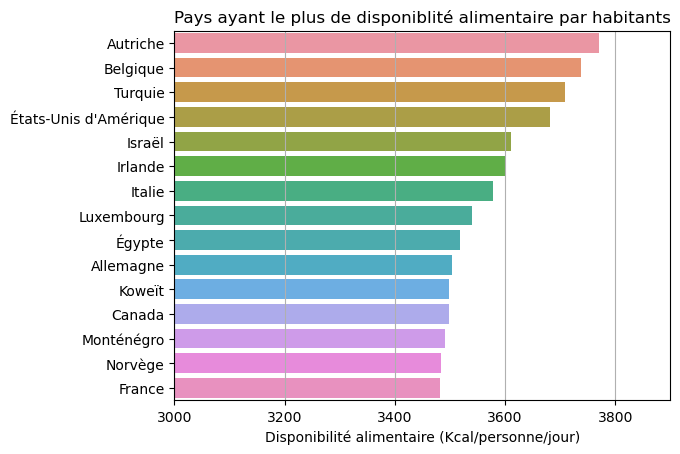

In [61]:
# Représentation graphique
sns.barplot(data=pays_top_dispo, x='Disponibilité alimentaire (Kcal/personne/jour)', y='Zone')
plt.title('Pays ayant le plus de disponiblité alimentaire par habitants')
plt.grid(axis='x')
plt.xlim(3000,3900)
plt.xticks([3000,3200,3400,3600,3800])
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylabel('')
plt.show()

In [62]:
# Pays ayant le moins de disponiblité par habitants
print('\n\nLes pays ayant le moins de disponiblité alimentaire par habitants sont les suivants :')
pays_down_dispo = dispo_alim_classement.iloc[-15:,1:7]
display(pays_down_dispo.head(15))



Les pays ayant le moins de disponiblité alimentaire par habitants sont les suivants :


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Habitants en sous-alimentation (milliers),Habitants (milliers),proportion en %
159,Kenya,2205.0,2017,11900.0,50221.142,0.026739
160,République-Unie de Tanzanie,2204.0,2017,13400.0,54660.339,0.030109
161,Tadjikistan,2199.0,2017,0.0,8880.268,0.000000
162,Namibie,2166.0,2017,300.0,2402.633,0.000674
163,Timor-Leste,2129.0,2017,400.0,1243.258,0.000899
164,Éthiopie,2129.0,2017,21100.0,106399.924,0.047411
165,Ouganda,2126.0,2017,0.0,41166.588,0.000000
166,Zimbabwe,2113.0,2017,0.0,14236.595,0.000000
167,Tchad,2109.0,2017,5700.0,15016.753,0.012808
168,République populaire démocratique de Corée,2093.0,2017,12000.0,25429.825,0.026963


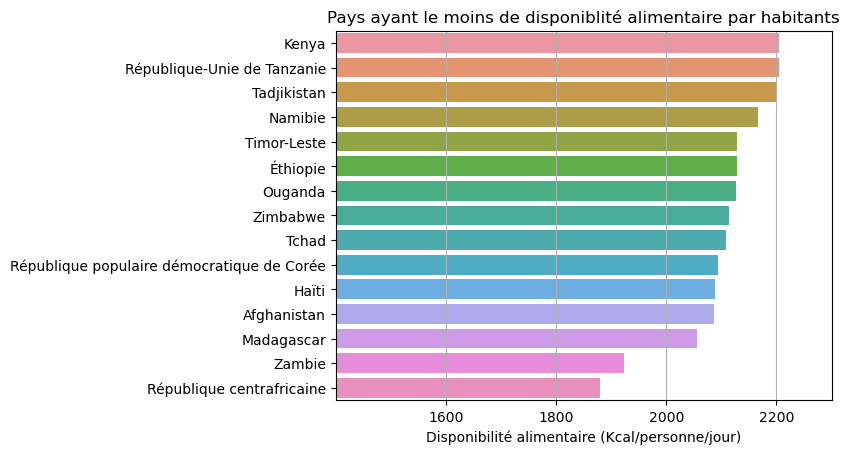

In [67]:
# Représentation graphique
sns.barplot(data=pays_down_dispo, x='Disponibilité alimentaire (Kcal/personne/jour)', y='Zone')
plt.title('Pays ayant le moins de disponiblité alimentaire par habitants')
plt.grid(axis='x')
plt.xlim(1400,2300)
plt.xticks([1600,1800,2000,2200])
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylabel('')
plt.show()

# XI) Les pays les plus en difficulté alimentaire
Sélection de la taille de la population en sous nutrition, supérieur à 5 millions d'habitants, afin de mettre en relief les pays les plus en difficulté alimentaire.

In [64]:
# Utilisation du fichier sous nutrition

# Remplacement des caractères '<0.1' par 0.05 et conversion numérique
sous_nutrition.loc[sous_nutrition['Valeur'] == "<0.1", 'Valeur'] = 0.05
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

# Pour l'année 2017
pays_diff_alim_2017 = sous_nutrition.loc[(sous_nutrition['Année'] == '2016-2018') & (sous_nutrition['Valeur'] >= 5), :].sort_values(by='Valeur', ascending=False).reset_index()
pays_diff_alim_2017.rename(columns={'Valeur':'Population en sous nutrition (millions habitants)'}, inplace=True)
pays_diff_alim_2017.head()

,index,Zone,Année,Population en sous nutrition (millions habitants)
0,508,Inde,2016-2018,190.1
1,820,Pakistan,2016-2018,24.8
2,514,Indonésie,2016-2018,23.6
3,772,Nigéria,2016-2018,22.8
4,100,Bangladesh,2016-2018,21.5


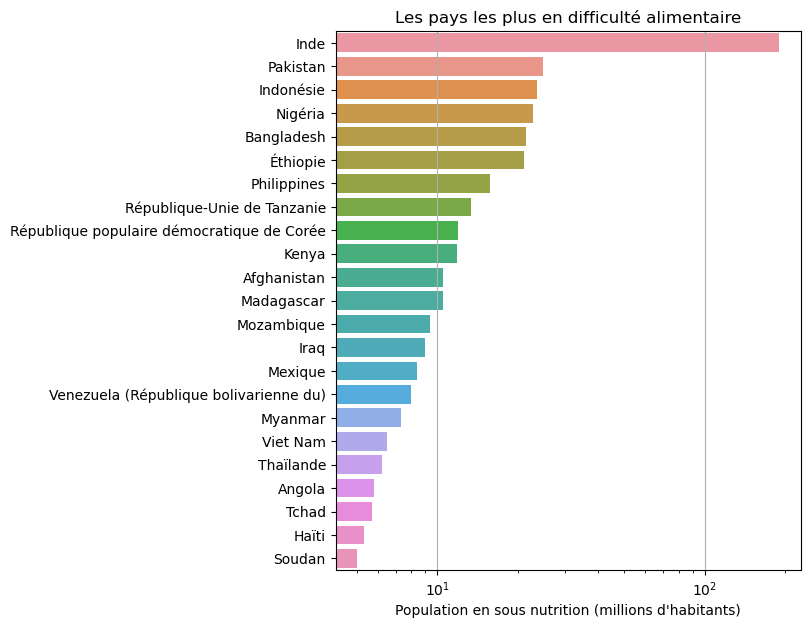

In [65]:
# Graphique logarithmique
f, ax = plt.subplots(figsize=(6,7))
sns.barplot(data=pays_diff_alim_2017, x='Population en sous nutrition (millions habitants)', y='Zone')
plt.xscale('log')
plt.title('Les pays les plus en difficulté alimentaire')
plt.ylabel('')
plt.grid(axis='x')
plt.xlabel('Population en sous nutrition (millions d\'habitants)')
plt.show()